# 決定係数
> *決定係数（けっていけいすう、（英: coefficient of determination、R2）は、統計学において、独立変数（説明変数）が従属変数（目的変数）のどれくらいを説明できるかを表す値である。寄与率と呼ばれることもある。* 出典：
[決定係数 出典: フリー百科事典『ウィキペディア（Wikipedia）』](https://ja.wikipedia.org/wiki/%E6%B1%BA%E5%AE%9A%E4%BF%82%E6%95%B0)

- 一般に高ければ高いほどよい評価指標
- 最も良い場合に1になる
- ただし、特徴を増やせば増やすほど高くなる傾向にある
- この指標だけを見て「モデルの精度が高い」とは判断できない

<iframe width="560" height="315" src="https://www.youtube.com/embed/koy1HmVfjvU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数を固定
RND = 777
np.random.seed(RND)

# youtube動画を表示
import IPython.display

# サンプルデータに対してモデルを作成し決定係数を計算
## 予測が当たりやすいデータを作成

In [3]:
X, y = make_regression(
    n_samples=1000,
    n_informative=3,
    n_features=20,
    random_state=RND,
)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.33, random_state=RND
)

model = RandomForestRegressor(max_depth=5)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

### 決定係数を計算
```{hint}
[sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
```

Text(0, 0.5, '予測')

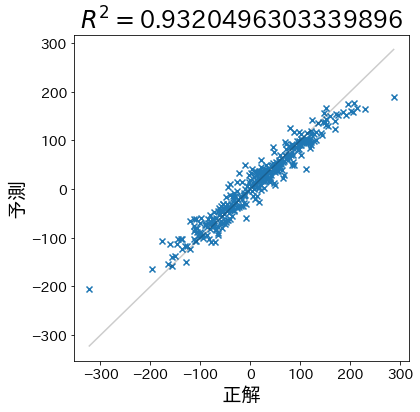

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(test_y, pred_y)
y_min, y_max = np.min(test_y), np.max(test_y)

plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(test_y, pred_y, marker="x")
plt.xlabel("正解")
plt.ylabel("予測")

## 予測が当たりにくいデータを作成
決定係数が下がることを確認します。

In [5]:
X, y = make_regression(
    n_samples=1000,
    n_informative=3,
    n_features=20,
    effective_rank=4,
    noise=1.5,
    random_state=RND,
)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.33, random_state=RND
)

model = RandomForestRegressor(max_depth=5)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

Text(0, 0.5, '予測')

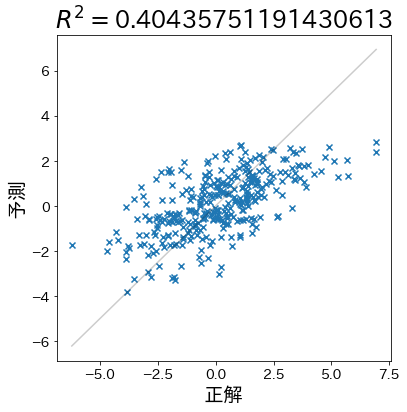

In [6]:
r2 = r2_score(test_y, pred_y)
y_min, y_max = np.min(test_y), np.max(test_y)

plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(test_y, pred_y, marker="x")
plt.xlabel("正解")
plt.ylabel("予測")

## 予測がデタラメな場合
単純に平均を予測するよりも更に精度が悪い時、決定係数がマイナスになることを確認します。

In [7]:
X, y = make_regression(
    n_samples=1000,
    n_informative=3,
    n_features=20,
    effective_rank=4,
    noise=1.5,
    random_state=RND,
)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.33, random_state=RND
)

# train_yをランダムに並び替え、さらに値を変換する
train_y = np.random.permutation(train_y)
train_y = np.sin(train_y) * 10 + 1

model = RandomForestRegressor(max_depth=1)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

Text(0, 0.5, '予測')

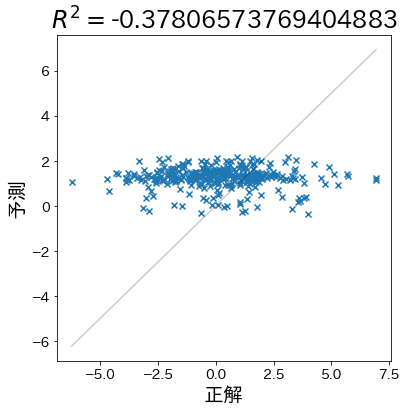

In [8]:
r2 = r2_score(test_y, pred_y)
y_min, y_max = np.min(test_y), np.max(test_y)

plt.figure(figsize=(6, 6))
plt.title(f"$R^2 =${r2}")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="-", c="k", alpha=0.2)
plt.scatter(test_y, pred_y, marker="x")
plt.xlabel("正解")
plt.ylabel("予測")

## 最小二乗法を使用した時の決定係数
最小二乗法による単回帰の回帰直線の場合、決定係数の範囲が $ 0 \le R^2 \le 1$ になります。
データにランダムにノイズを載せて、100回線形回帰を実行し決定係数を求めてみます。

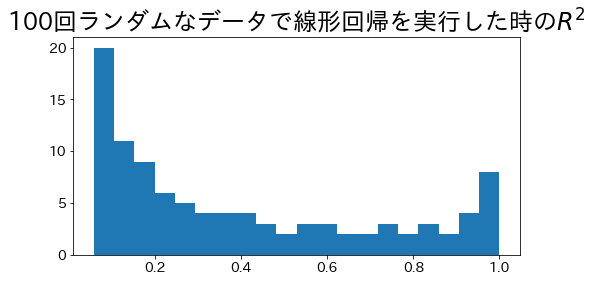

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

r2_scores = []
for i in range(100):
    # データ作成
    X, y = make_regression(
        n_samples=500,
        n_informative=1,
        n_features=1,
        effective_rank=4,
        noise=i * 0.1,
        random_state=RND,
    )
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.33, random_state=RND
    )

    # 線形回帰
    model = make_pipeline(
        StandardScaler(with_mean=False), LinearRegression(positive=True)
    ).fit(train_X, train_y)

    # 決定係数を算出
    pred_y = model.predict(test_X)
    r2 = r2_score(test_y, pred_y)
    r2_scores.append(r2)


plt.figure(figsize=(8, 4))
plt.title("100回ランダムなデータで線形回帰を実行した時の$R^2$")
plt.hist(r2_scores, bins=20)
plt.show()